In [1]:
from scipy.optimize import minimize
import numpy as np
#目标函数：
def func(args):
    fun = lambda x: 60 - 10*x[0] - 4*x[1] + x[0]**2 + x[1]**2 - x[0]*x[1] 
    return fun

#约束条件，包括等式约束和不等式约束
def con(args):
    cons = ({'type': 'eq', 'fun': lambda x: x[0]+x[1]-8})
    return cons

# 解决问题是：当x1+x2=8时，求解函数60-10x1-4x2+x1^2+x2^2-x1x2的极小值

if __name__ == "__main__":
    args = ()
    args1 = ()
    cons = con(args1)
    x0 = np.array((2.0, 1.0)) #设置初始值，初始值的设置很重要，很容易收敛到另外的极值点中，建议多试几个值

    #求解#
    res = minimize(func(args), x0, method='SLSQP', constraints=cons)
    print(res)

     fun: 17.000000000000007
     jac: array([-3.        , -2.99999928])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([4.99999994, 3.00000006])


In [2]:
def func(x):
    return 10.5+0.3*x[0]+0.32*x[1]+0.32*x[2]+0.0007*x[0]**2+0.0004*x[1]**2+0.00045*x[2]**2
cons=({'type':'eq','fun':lambda x: x[0]+x[1]+x[2]-700})
b1,b2,b3=(100,200),(120,250),(150,300)
x0=np.array([100,200,400])
res=minimize(func,x0,method='SLSQP',constraints=cons,bounds=(b1,b2,b3))
print(res)

     fun: 311.35869567784977
     jac: array([0.55868912, 0.51999664, 0.55870056])
 message: 'Optimization terminated successfully'
    nfev: 32
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([184.77788356, 250.        , 265.22211644])


In [3]:
from sko.GA import GA
def func(x):
    return 10.5+0.3*x[0]+0.32*x[1]+0.32*x[2]+0.0007*x[0]**2+0.0004*x[1]**2+0.00045*x[2]**2
cons=lambda x: x[0]+x[1]+x[2]-700
b1,b2,b3=(100,200),(120,250),(150,300)
ga=GA(func=func,n_dim=3,size_pop=500,max_iter=500,constraint_eq=[cons],lb=[100,120,150],ub=[200,250,300])
best_x,best_y=ga.run()
print("best x:\n",best_x,"\nbest_y:\n",best_y)

best x:
 [191.81547583 238.4477562  269.73676797] 
best_y:
 [311.90291299]


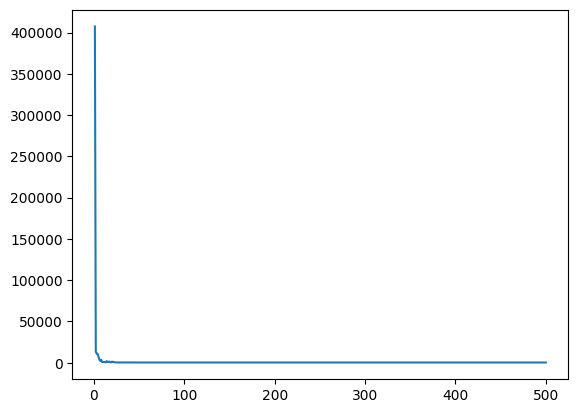

In [4]:
history=ga.all_history_Y
import matplotlib.pyplot as plt
funclist=[min(i) for i in history]
plt.plot(np.arange(1,501),funclist)
plt.show()

In [5]:
def tkm(x):
    s=0
    j=3
    a=[1,25,8.75,0.5,5.75,3,7.25]
    b=[1.25,0.75,4.75,5,6.5,7.25]
    for i in range(6):
        s+=x[j+1]*np.sqrt((x[0]-a[i])**2+(x[1]-b[i])**2)+x[j+2]*np.sqrt((x[2]-a[i])**2+(x[3]-b[i])**2)
        j+=2
    return s
lccons=({'type':'eq','fun':lambda x: x[4]+x[10]-3},
        {'type':'eq','fun':lambda x: x[5]+x[11]-5},
        {'type':'eq','fun':lambda x: x[6]+x[12]-7},
        {'type':'eq','fun':lambda x: x[7]+x[13]-7},
        {'type':'eq','fun':lambda x: x[8]+x[14]-6},
        {'type':'eq','fun':lambda x: x[9]+x[15]-11},
        {'type':'ineq','fun':lambda x: x[4]+x[5]+x[6]+x[7]+x[8]+x[9]-20},
        {'type':'ineq','fun':lambda x: x[10]+x[11]+x[12]+x[13]+x[14]+x[15]-20})
b=((0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None))
x0=np.ones((16,1))
res=minimize(tkm,x0,method='SLSQP',constraints=lccons,bounds=b)
print(res.x)

[5.75071053e+00 6.50153248e+00 8.30566703e+00 4.87451085e+00
 1.31660950e+00 2.54373956e+00 1.62448554e-10 1.25122006e-10
 4.98453371e+00 1.10000001e+01 1.79432487e+00 2.52216553e+00
 7.32228255e+00 7.34576075e+00 1.01546630e+00 1.57084105e-10]


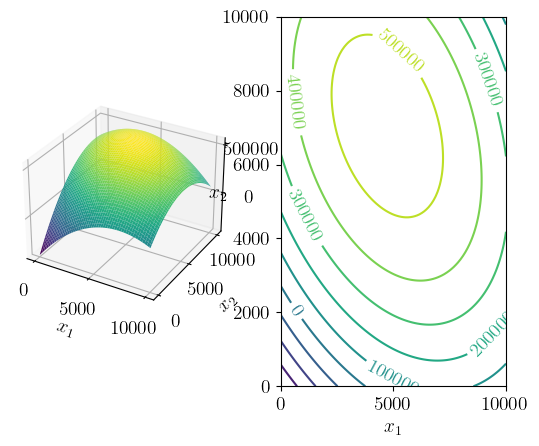

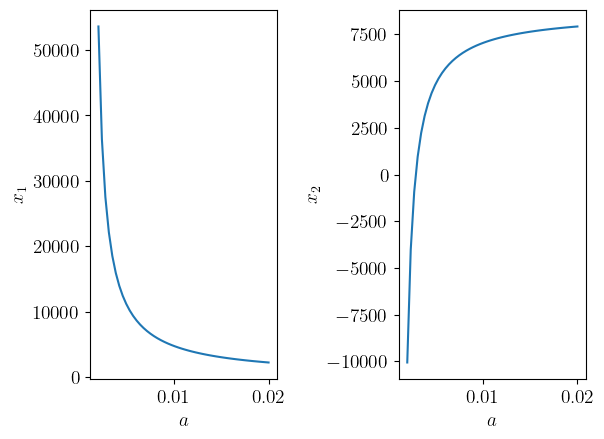

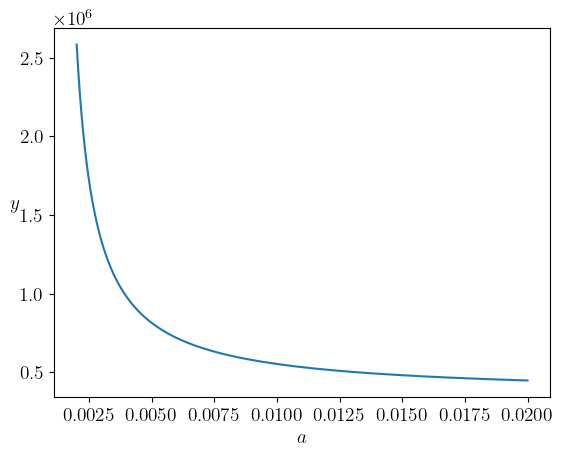

In [7]:
import sympy as sp
plt.rc('text', usetex=True) #使用 LaTeX字体
plt.rc('font',size=14)
sp.var('x1, x2') #定义符号变量
y = (339-0.01*x1-0.003*x2)*x1+(399-0.004*x1-0.01*x2)*x2-(400000+195*x1+225*x2)
y = sp.simplify(y) #化简
dy1 = y.diff(x1) #求关于 x1的偏导
dy2 = y.diff(x2) #求关于 x2的偏导
s = sp.solve([dy1, dy2], [x1, x2])
x10 = round(float(s[x1])) #取整
x20 = round(float(s[x2]))
y0 = y.subs({x1: x10, x2: x20}) #符号函数代入数值
f = sp.lambdify('x1, x2', y, 'numpy') #符号函数转换为匿名函数
x = plt.linspace(0, 10000, 100)
X, Y = plt.meshgrid(x, x) #转换为网格数据
Z = f(X, Y)
ax=plt.subplot(121, projection='3d') #第一个子窗口三维画图
ax.plot_surface(X, Y, Z,cmap='viridis')
ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
plt.subplot(122) #激活第二个子窗口
contr=plt.contour(X,Y,Z,10) #10条等高线
plt.clabel(contr) #等高线标注
plt.ylabel('$x_2$',rotation=0)
plt.xlabel('$x_1$')
sp.var('a', pos=True) #定义灵敏度 分析 的符号参数
y = (339-a*x1-0.003*x2)*x1+(399-0.004*x1-0.01*x2)*x2-(400000+195*x1+225*x2)
y = sp.simplify(y) #化简
dy1 = y.diff(x1) #求关于 x1的偏导
dy2 = y.diff(x2) #求关于 x2的偏导
s = sp.solve([dy1, dy2], [x1, x2])
sx1 = s[x1]; sx2 = s[x2] #提取解分量
s1 = sp.lambdify('a', sx1, 'numpy') #符号函数转换为匿名函数
s2 = sp.lambdify('a', sx2, 'numpy')
a0 = plt.linspace(0.002, 0.02, 50)
plt.figure()
plt.subplots_adjust(wspace = 0.65)
plt.subplot(121)
plt.plot(a0, s1(a0))
plt.xlabel('$a$')
plt.ylabel('$x_1$')
plt.subplot(122)
plt.plot(a0, s2(a0))
plt.xlabel('$a$')
plt.ylabel('$x_2$')
#plt.subplot_tool() #调整位置的工具
dx1 = sx1.diff(a)
dx10 = dx1.subs(a, 0.01)
sx1a = dx10 * 0.01 / 4735
dx2 = sx2.diff(a)
dx20 = dx2.subs(a, 0.01)
sx2a = dx20 * 0.01 / 7043
Y = y.subs({x1: s[x1], x2: s[x2]}) #求关于 a的目标函数
Y = sp.factor(Y)
Y = sp.simplify(Y)
Ya = sp.lambdify('a', Y, 'numpy') #转换为匿名函数
a0 = plt.linspace(0.002, 0.02, 1000)
plt.figure(); plt.plot(a0, Ya(a0))
plt.xlabel('$a$')
plt.ylabel('$y$', rotation=0)
Sya = - 4735 ** 2 * 0.01 / 553641.025
y2 = y.subs({x1: 4735, x2: 7043, a: 0.011}) #计算近似最优利润
y3 = Y.subs(a, 0.011) #计算最优利润
delta = (y3 - y2) / y2 #计算利润的相对误差
plt.show()

In [43]:
from scipy.optimize import linprog
c=np.array([0,0,0,0,1,0,1,0,1,0,1,-1,1,-1,1])
Aeq=np.array([[20000,10000,20000,-1,1,0,0,0,0,0,0,0,0,0,0],
              [1,0,0,0,0,-1,1,0,0,0,0,0,0,0,0],
              [-1,1,0,0,0,0,0,-1,1,0,0,0,0,0,0],
              [0,-1,1,0,0,0,0,0,0,-1,1,0,0,0,0],
              [1,0,0,0,0,0,0,0,0,0,0,-1,1,0,0],
              [0,1,0,0,0,0,0,0,0,0,0,0,0,-1,1]])
beq=np.array([[300000,3,3,0,3,3]])
bounds=[(0,10)]*15
res=linprog(c,None,None,Aeq,beq,bounds)
res

     con: array([ 7.14766793e-06,  5.71795944e-11,  8.57687255e-11, -8.88178420e-16,
        5.71809267e-11,  5.71791503e-11])
     fun: -5.400399998986692
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([4.20020000e+00, 7.20020000e+00, 7.20020000e+00, 9.99999994e+00,
       1.43901070e-10, 1.20020000e+00, 1.41945933e-10, 7.40080079e-10,
       1.76134767e-10, 1.76263437e-10, 7.04020027e-10, 5.60010000e+00,
       4.39990000e+00, 7.10010000e+00, 2.89990000e+00])